<a href="https://colab.research.google.com/github/mallaambuluri/my-Machine-Learning-Projects/blob/main/Detection_of_Outliers_by_using_variational_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
data = pd.read_csv('/data.csv',usecols =['x','y'])

In [ ]:
data.head(5)

,x,y
0,1.041846,-0.036715
1,1.051995,0.008304
2,0.963828,0.066547
3,1.044986,-0.017943
4,0.981631,-0.005251


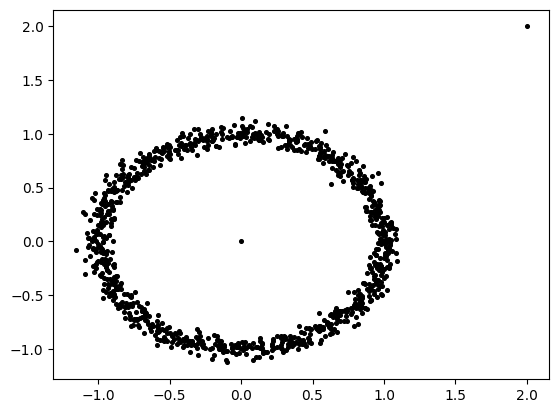

In [ ]:
_ = plt.scatter(x = data['x'],y =data['y'],s =7,color ='black')
plt.show()

In [ ]:
data_tensor = tf.convert_to_tensor(data).numpy()

In [ ]:
shuffled_points = tf.random.shuffle(data_tensor)

encoder = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1) # one-dimension output
])

decoder = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(2) # two-dimension output (again)
])

autoencoder = tf.keras.Sequential([
    encoder,
    decoder
])

autoencoder.compile(loss='mse')
autoencoder.fit(
    x=shuffled_points,
    y=shuffled_points,
    validation_split=0.2,epochs = 500)

Epoch 1/500
26/26 [==============================] - 3s 13ms/step - loss: 0.4043 - val_loss: 0.3466
Epoch 2/500
26/26 [==============================] - 0s 5ms/step - loss: 0.3439 - val_loss: 0.3178
Epoch 3/500
26/26 [==============================] - 0s 4ms/step - loss: 0.3197 - val_loss: 0.2983
Epoch 4/500
26/26 [==============================] - 0s 4ms/step - loss: 0.2979 - val_loss: 0.2734
Epoch 5/500
26/26 [==============================] - 0s 4ms/step - loss: 0.2788 - val_loss: 0.2526
Epoch 6/500
26/26 [==============================] - 0s 4ms/step - loss: 0.2628 - val_loss: 0.2439
Epoch 7/500
26/26 [==============================] - 0s 4ms/step - loss: 0.2510 - val_loss: 0.2258
Epoch 8/500
26/26 [==============================] - 0s 4ms/step - loss: 0.2407 - val_loss: 0.2192
Epoch 9/500
26/26 [==============================] - 0s 4ms/step - loss: 0.2307 - val_loss: 0.2081
Epoch 10/500
26/26 [==============================] - 0s 4ms/step - loss: 0.2208 - val_loss: 0.2023
Epoch 11

In [ ]:
reconstructed_points = autoencoder(data_tensor)

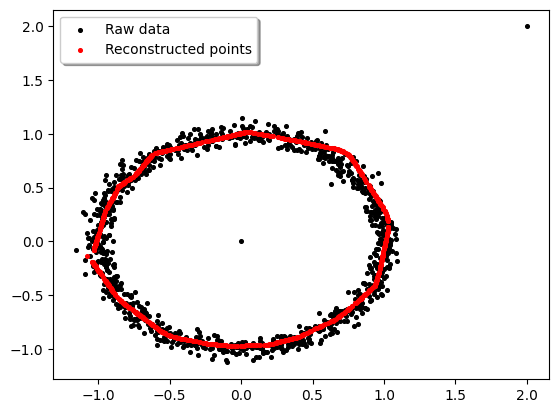

In [ ]:
_ = plt.scatter(x=data['x'], y=data['y'], color='black', s=7, label='Raw data')
_ = plt.scatter(x=reconstructed_points[:, 0], y=reconstructed_points[:, 1], color='red', s=7, label='Reconstructed points')
_ = plt.legend(shadow=True)
plt.show()

In [ ]:
reconstruction_error = tf.reduce_sum(
        (autoencoder(data_tensor) - data_tensor)**2, axis=1
    ) # MSE

In [ ]:
df = pd.DataFrame(
        {"x": data['x'].values,
         "y": data['y'].values,
         "reconstruction_error": reconstruction_error}
    )

df.tail(10)

,x,y,reconstruction_error
992,0.972528,-0.012169,0.012822
993,0.989327,0.002839,0.012772
994,1.012325,0.020410,0.013126
995,1.082578,0.021130,0.014955
996,1.030619,-0.067875,0.007525
997,1.025656,-0.077811,0.007993
998,0.955386,-0.015802,0.014722
999,1.022972,0.001682,0.010699
1000,0.000000,0.000000,0.926457
1001,2.000000,2.000000,3.722326
